<a href="https://colab.research.google.com/github/daa103/DAA_ESAA/blob/main/wine%ED%92%88%EC%A7%88%EB%B6%84%EB%A5%98final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##**와인 품질(Quality) 분류 경진대회**
1. train.csv / test.csv
###데이터분류
* index 구분자
* quality 품질
* fixed acidity 산도
* volatile acidity 휘발성산
* citric acid 시트르산
* residual sugar 잔당 : 발효 후 와인 속에 남아있는 당분
* chlorides 염화물
* free sulfur dioxide 독립 이산화황
* total sulfur dioxide 총 이산화황
* density 밀도
* pH 수소이온농도
* sulphates 황산염
* alcohol 도수
* type 종류

> - 데이터전처리/시각화
- 분류모델 3가지이상 적용

###**1. 데이터셋 불러오기**

In [1]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
from google.colab import files
file_uploaded=files.upload()

Saving sample_submission.csv to sample_submission.csv
Saving test.csv to test.csv
Saving train.csv to train.csv


In [3]:
import pandas as pd
train = pd.read_csv("/content/drive/MyDrive/ESAA_data/train.csv")
test = pd.read_csv("/content/drive/MyDrive/ESAA_data/test.csv")
sub = pd.read_csv('/content/drive/MyDrive/ESAA_data/sample_submission.csv')

* 데이터 형태 확인하기

In [4]:
train.head()

,index,quality,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,type
0,0,5,5.6,0.695,0.06,6.8,0.042,9.0,84.0,0.99432,3.44,0.44,10.2,white
1,1,5,8.8,0.610,0.14,2.4,0.067,10.0,42.0,0.99690,3.19,0.59,9.5,red
2,2,5,7.9,0.210,0.39,2.0,0.057,21.0,138.0,0.99176,3.05,0.52,10.9,white
3,3,6,7.0,0.210,0.31,6.0,0.046,29.0,108.0,0.99390,3.26,0.50,10.8,white
4,4,6,7.8,0.400,0.26,9.5,0.059,32.0,178.0,0.99550,3.04,0.43,10.9,white


In [5]:
train.describe()

,index,quality,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
count,5497.000000,5497.000000,5497.000000,5497.000000,5497.000000,5497.000000,5497.000000,5497.000000,5497.000000,5497.000000,5497.000000,5497.000000,5497.000000
mean,2748.000000,5.818992,7.210115,0.338163,0.318543,5.438075,0.055808,30.417682,115.566491,0.994673,3.219502,0.530524,10.504918
std,1586.991546,0.870311,1.287579,0.163224,0.145104,4.756676,0.034653,17.673881,56.288223,0.003014,0.160713,0.149396,1.194524
min,0.000000,3.000000,3.800000,0.080000,0.000000,0.600000,0.009000,1.000000,6.000000,0.987110,2.740000,0.220000,8.000000
25%,1374.000000,5.000000,6.400000,0.230000,0.250000,1.800000,0.038000,17.000000,78.000000,0.992300,3.110000,0.430000,9.500000
50%,2748.000000,6.000000,7.000000,0.290000,0.310000,3.000000,0.047000,29.000000,118.000000,0.994800,3.210000,0.510000,10.300000
75%,4122.000000,6.000000,7.700000,0.400000,0.390000,8.100000,0.064000,41.000000,155.000000,0.996930,3.320000,0.600000,11.300000
max,5496.000000,9.000000,15.900000,1.580000,1.660000,65.800000,0.610000,289.000000,440.000000,1.038980,4.010000,2.000000,14.900000


In [7]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5497 entries, 0 to 5496
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   index                 5497 non-null   int64  
 1   quality               5497 non-null   int64  
 2   fixed acidity         5497 non-null   float64
 3   volatile acidity      5497 non-null   float64
 4   citric acid           5497 non-null   float64
 5   residual sugar        5497 non-null   float64
 6   chlorides             5497 non-null   float64
 7   free sulfur dioxide   5497 non-null   float64
 8   total sulfur dioxide  5497 non-null   float64
 9   density               5497 non-null   float64
 10  pH                    5497 non-null   float64
 11  sulphates             5497 non-null   float64
 12  alcohol               5497 non-null   float64
 13  type                  5497 non-null   object 
dtypes: float64(11), int64(2), object(1)
memory usage: 601.4+ KB


In [8]:
train.nunique().sort_values(ascending=True)

type                       2
quality                    7
citric acid               89
alcohol                  103
fixed acidity            106
sulphates                106
pH                       107
free sulfur dioxide      127
volatile acidity         179
chlorides                205
total sulfur dioxide     271
residual sugar           309
density                  970
index                   5497
dtype: int64

###**2. EDA/전처리**

In [9]:
train.isnull().sum()

index                   0
quality                 0
fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
type                    0
dtype: int64

In [10]:
test.isnull().sum()

index                   0
fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
type                    0
dtype: int64

* null값이 존재하지않음-결측지 제거 필요없음


* 레이블데이터 **인코딩**하기-type 피처를 라벨인코딩해주기
* redwine=0, whitewine=1

In [6]:
print('인코딩전 type분포:\n',train['type'].value_counts())

인코딩전 type분포:
 white    4159
red      1338
Name: type, dtype: int64


In [7]:
from sklearn.preprocessing import LabelEncoder
items = ['red','white']

#LabelEncoder를 객체로 생성후 fit()과 transfrom()으로 레이블 인코딩 수행
encoder = LabelEncoder() 
train['type']=encoder.fit_transform(train['type'])
print('인코딩후 변환값:\n',train['type'].value_counts())

인코딩후 변환값:
 1    4159
0    1338
Name: type, dtype: int64


In [8]:
encoder = LabelEncoder() 
test['type']=encoder.fit_transform(test['type'])
print('인코딩후 변환값:\n',train['type'].value_counts())

인코딩후 변환값:
 1    4159
0    1338
Name: type, dtype: int64


In [14]:
train.sort_values(by=["quality"])

,index,quality,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,type
4254,4254,3,4.2,0.215,0.23,5.1,0.041,64.0,157.0,0.99688,3.42,0.44,8.00,1
978,978,3,6.7,0.760,0.02,1.8,0.078,6.0,12.0,0.99600,3.55,0.63,9.95,0
5044,5044,3,10.3,0.170,0.47,1.4,0.037,5.0,33.0,0.99390,2.89,0.28,9.60,1
1568,1568,3,11.6,0.580,0.66,2.2,0.074,10.0,47.0,1.00080,3.25,0.57,9.00,0
3580,3580,3,11.8,0.230,0.38,11.1,0.034,15.0,123.0,0.99970,2.93,0.55,9.70,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2194,2194,9,6.6,0.360,0.29,1.6,0.021,24.0,85.0,0.98965,3.41,0.61,12.40,1
3198,3198,9,6.9,0.360,0.34,4.2,0.018,57.0,119.0,0.98980,3.28,0.36,12.70,1
2324,2324,9,9.1,0.270,0.45,10.6,0.035,28.0,124.0,0.99700,3.20,0.46,10.40,1
3497,3497,9,7.1,0.260,0.49,2.2,0.032,31.0,113.0,0.99030,3.37,0.42,12.90,1


* 퀄리티 3이 최솟값으로 9가 최댓값

In [14]:
train.rename(columns = {"fixed acidity": "fixed_acidity", "volatile acidity": "volatile_acidity",
                    "citric acid": "citric_acid", "residual sugar": "residual_sugar",
                    "chlorides": "chlorides", "free sulfur dioxide": "free_sulfur_dioxide",
                    "total sulfur dioxide": "total_sulfur_dioxide"}, inplace = True)
test.rename(columns = {"fixed acidity": "fixed_acidity", "volatile acidity": "volatile_acidity",
                    "citric acid": "citric_acid", "residual sugar": "residual_sugar",
                    "chlorides": "chlorides", "free sulfur dioxide": "free_sulfur_dioxide",
                    "total sulfur dioxide": "total_sulfur_dioxide"}, inplace = True)

In [9]:
# 인덱스 드롭
train.drop(['index'],axis=1,inplace=True)
test.drop(['index'],axis=1,inplace=True)

In [10]:
train["quality"] = (train["quality"] > 6.5).astype(int)

train["quality"].value_counts()

0    4416
1    1081
Name: quality, dtype: int64

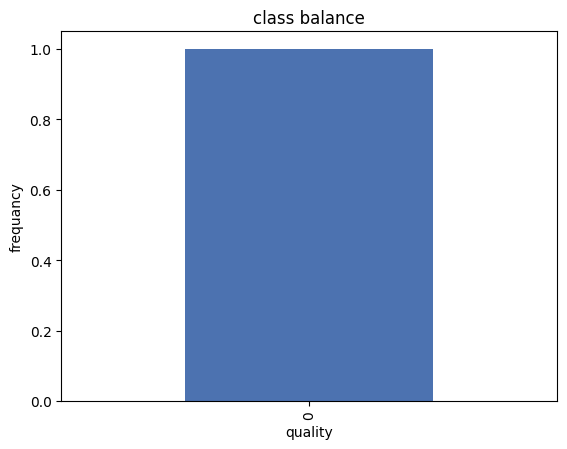

In [21]:
plt.style.use('seaborn-deep')
train["quality"].value_counts(normalize=True).plot(kind="bar")
plt.xlabel("quality")
plt.ylabel("frequancy")
plt.title("class balance");

**데이터시각화 살펴보기**

In [18]:
train.describe()[1:].style.background_gradient()

,quality,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,type
mean,0.196653,7.210115,0.338163,0.318543,5.438075,0.055808,30.417682,115.566491,0.994673,3.219502,0.530524,10.504918,0.756595
std,0.397504,1.287579,0.163224,0.145104,4.756676,0.034653,17.673881,56.288223,0.003014,0.160713,0.149396,1.194524,0.429177
min,0.000000,3.800000,0.080000,0.000000,0.600000,0.009000,1.000000,6.000000,0.987110,2.740000,0.220000,8.000000,0.000000
25%,0.000000,6.400000,0.230000,0.250000,1.800000,0.038000,17.000000,78.000000,0.992300,3.110000,0.430000,9.500000,1.000000
50%,0.000000,7.000000,0.290000,0.310000,3.000000,0.047000,29.000000,118.000000,0.994800,3.210000,0.510000,10.300000,1.000000
75%,0.000000,7.700000,0.400000,0.390000,8.100000,0.064000,41.000000,155.000000,0.996930,3.320000,0.600000,11.300000,1.000000
max,1.000000,15.900000,1.580000,1.660000,65.800000,0.610000,289.000000,440.000000,1.038980,4.010000,2.000000,14.900000,1.000000


<Axes: xlabel='quality', ylabel='count'>

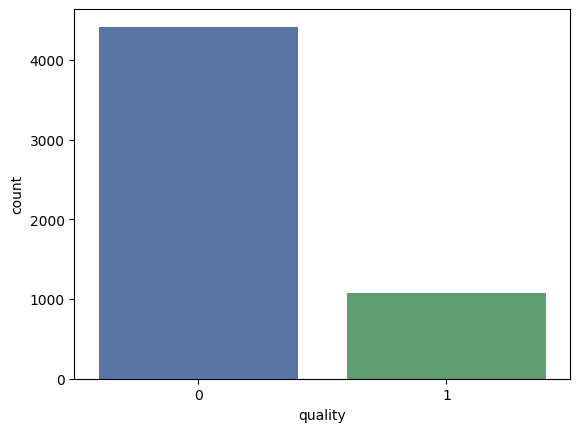

In [19]:
sns.countplot(data=train, x="quality")

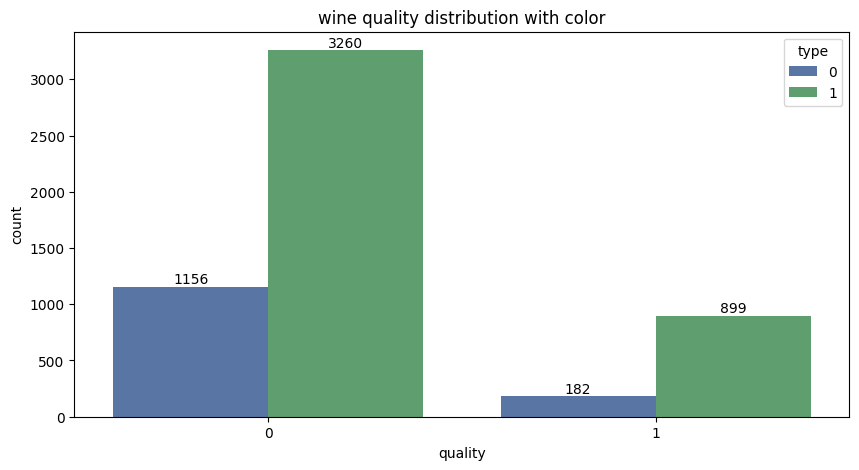

In [20]:
#quality와 type of wine의 관계성 확인 그래프
figure = plt.figure(figsize = (10,5))
ax = sns.countplot(x = "quality", hue = "type", data = train)
plt.title("wine quality distribution with color")
ax.bar_label(ax.containers[0], label_type='edge')
ax.bar_label(ax.containers[1], label_type='edge')
plt.show()

In [21]:
train.groupby('type')['quality'].mean()

type
0    0.136024
1    0.216158
Name: quality, dtype: float64

* 이상치 데이터 제거를위한 상관성 시각화 273

<Axes: >

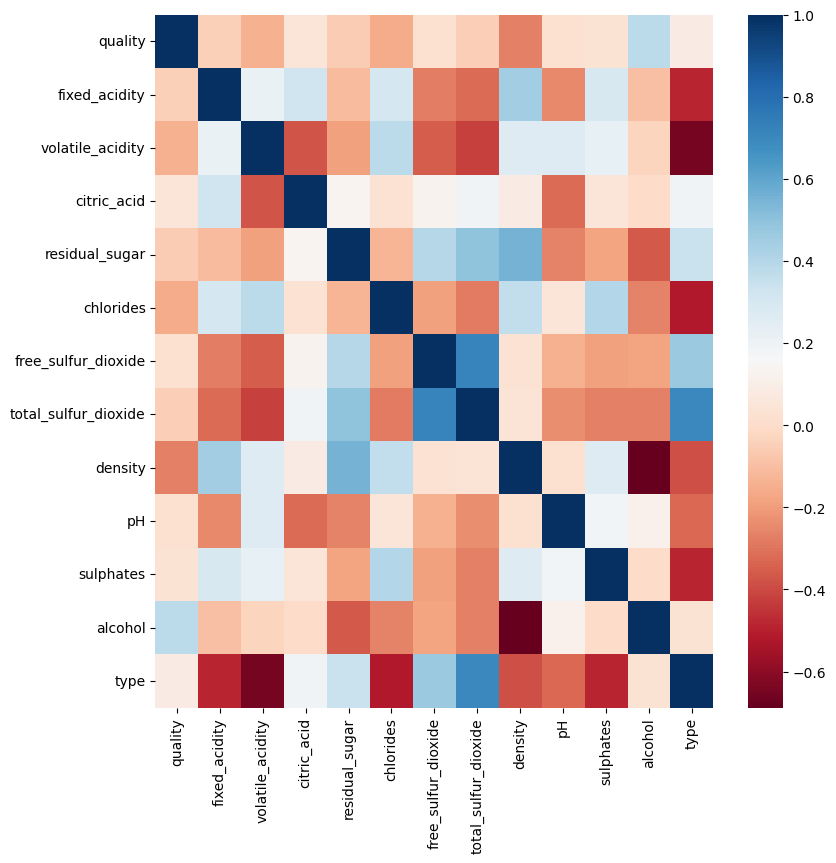

In [22]:
plt.figure(figsize=(9,9))
corr=train.corr()
sns.heatmap(corr,cmap='RdBu')

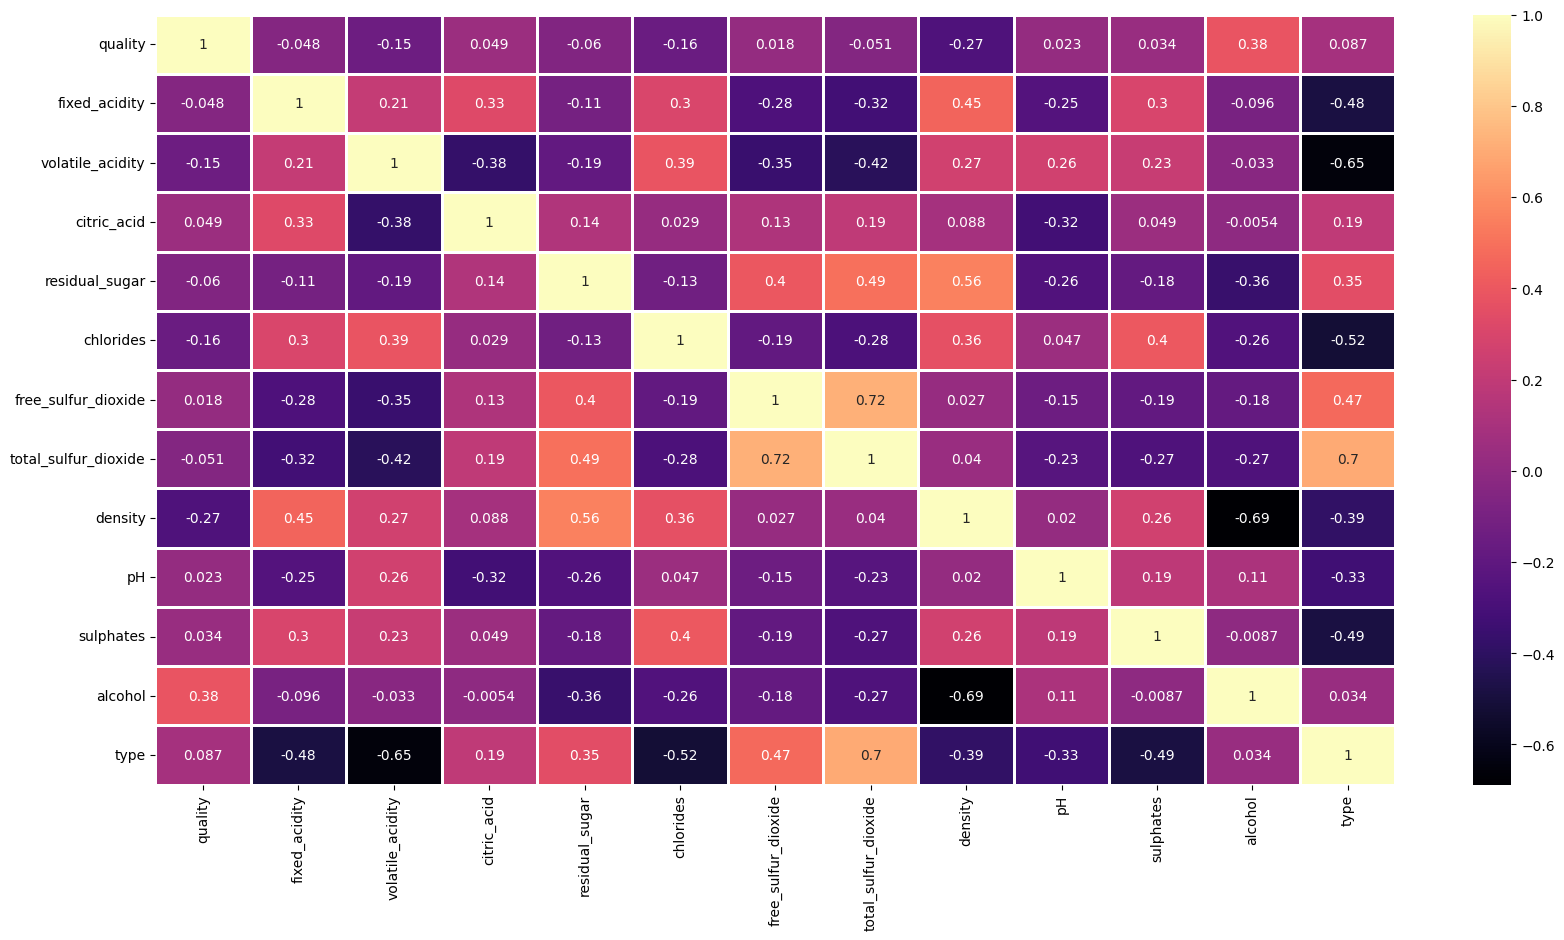

In [23]:
plt.figure(figsize = [20, 10], facecolor = 'white')
sns.heatmap(train.corr(), annot = True, linewidths = 2, cmap = "magma");

* quality와 density와 가장 강한 음의상관관계,그다음은 volatile acidity, alcohol과는 비교적 큰 양의상관관계 - alcohol에 해당하는 이상치 제거해보기

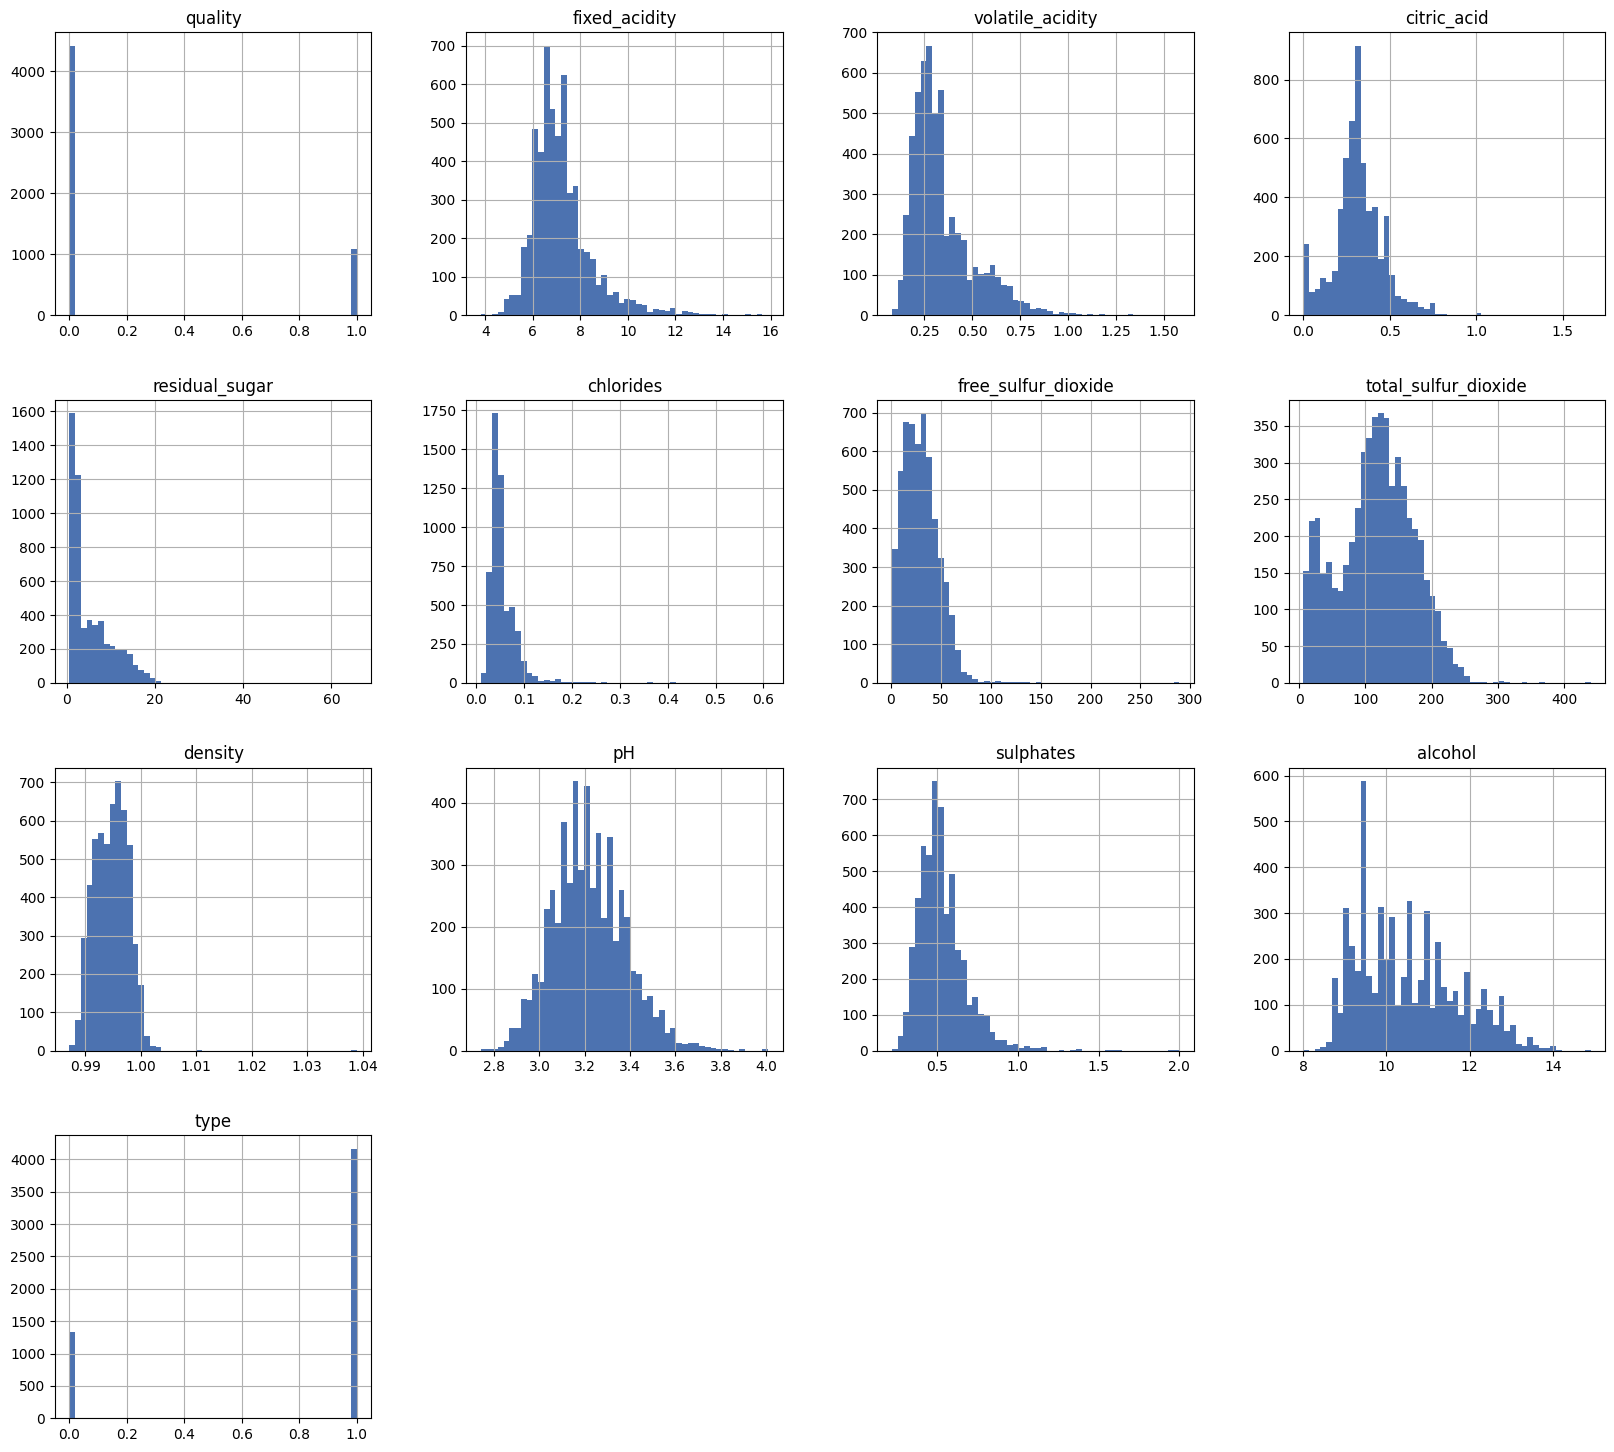

In [24]:
train_hist= train.hist(bins=50, figsize=(20, 18))

In [25]:
def chart_plot(df, feature):
    
    print(f"the skewness value of {feature} column = {df[feature].skew():.2f}")
    plt.figure(figsize=(10,4))
    
    plt.subplot(1,2,1)
    plt.title('histgram')
    sns.histplot(data=df, x=feature, kde=True)
    plt.axvline(x = df[feature].mean(), c = 'red')
    plt.axvline(x = df[feature].median(), c = 'green')

    plt.subplot(1,2,2)
    plt.title('Boxplot')
    sns.boxplot(y=df[feature])

the skewness value of fixed_acidity column = 1.71


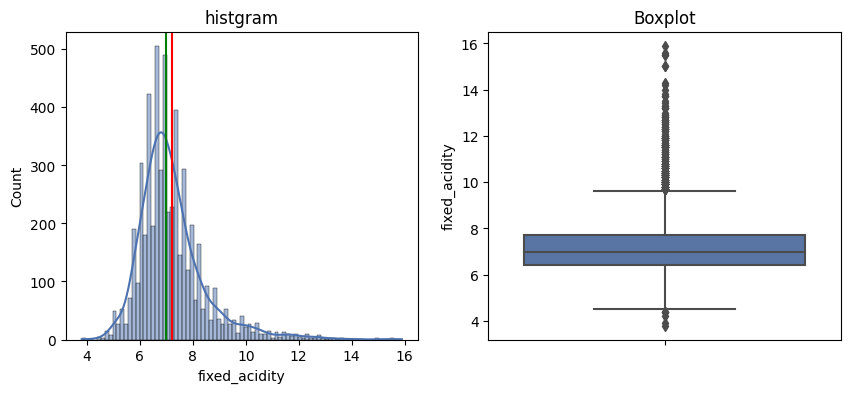

In [26]:
chart_plot(train,'fixed_acidity')

In [17]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
s_scaler = StandardScaler()
m_scaler = MinMaxScaler()

In [18]:
train.columns
s_col = ['fixed_acidity', 'volatile_acidity', 'citric_acid', 'residual_sugar',
         'chlorides', 'free_sulfur_dioxide', 'total_sulfur_dioxide', 'density',
         'pH', 'sulphates', 'alcohol']
# train.iloc[ : , :11].columns

In [19]:
#Standardization scalar
train_sscale = s_scaler.fit_transform(train[s_col])
train_N = pd.DataFrame(train_sscale, columns=s_col)

In [20]:
# Nomalization (Min-Max) scaler :

train_mscale = m_scaler.fit_transform(train[s_col])
train_N = pd.DataFrame(train_mscale, columns=s_col)

In [31]:
train_N.head()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol
0,0.148760,0.410000,0.036145,0.095092,0.054908,0.027778,0.179724,0.139001,0.551181,0.123596,0.318841
1,0.413223,0.353333,0.084337,0.027607,0.096506,0.031250,0.082949,0.188741,0.354331,0.207865,0.217391
2,0.338843,0.086667,0.234940,0.021472,0.079867,0.069444,0.304147,0.089647,0.244094,0.168539,0.420290
3,0.264463,0.086667,0.186747,0.082822,0.061564,0.097222,0.235023,0.130904,0.409449,0.157303,0.405797
4,0.330579,0.213333,0.156627,0.136503,0.083195,0.107639,0.396313,0.161751,0.236220,0.117978,0.420290


In [21]:
test.columns
s_col = ['fixed_acidity', 'volatile_acidity', 'citric_acid', 'residual_sugar',
         'chlorides', 'free_sulfur_dioxide', 'total_sulfur_dioxide', 'density',
         'pH', 'sulphates', 'alcohol']

In [33]:
# Nomalization (Min-Max) scaler : (for test data)

test_mscale = m_scaler.fit_transform(test[s_col])
test_N = pd.DataFrame(test_mscale, columns=s_col)

In [34]:
# Standardization scaler : (for test data)

test_sscale = s_scaler.fit_transform(test[s_col])
test_N = pd.DataFrame(test_sscale, columns=s_col)

In [35]:
test_N.head()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol
0,1.306951,-0.220579,1.098184,0.236865,-0.385503,-1.108531,-0.756734,-0.352060,-1.943080,-1.068114,1.000172
1,4.507070,0.477272,1.780836,-0.749722,0.343645,-0.888114,-1.327873,1.915724,-0.949812,-0.311854,-1.203025
2,-0.553583,-0.395042,-0.335387,-0.057012,-0.466520,0.709907,1.077835,-0.008456,-0.142782,1.063164,-0.864071
3,-0.032634,-1.151046,0.483796,-0.770714,-0.385503,-0.557489,0.731690,-0.008456,1.905833,-0.449356,-0.355641
4,-0.330319,-0.511350,-0.403653,-0.728731,-1.033635,-0.419728,-0.774041,-1.516876,-0.329020,-0.449356,1.169649


* 형태 변형-대부분이 right skewed데이터 

##**3.모델링**
**RandomForest**

In [11]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')

In [12]:
X = train.drop(columns='quality')
y = train['quality']
X_train, X_test, y_train, y_test = train_test_split(
    X , y ,
    test_size=0.2,
    random_state=42
)

In [13]:
X_features = train.drop(columns = 'quality',axis=1)
y_labels = train['quality']
X_train, X_test, y_train, y_test = train_test_split(X_features, y_labels, test_size=0.2, random_state=156)
train_cnt = y_train.count()
test_cnt = y_test.count()
print('학습 세트 Shape:{0}, 테스트 세트 Shape:{1}'.format(X_train.shape, X_test.shape))

print('학습 세트 레이블 값 분포 비율')
print(y_train.value_counts()/train_cnt)
print('\n 테스트 세트 레이블 값 분포 비율')
print(y_test.value_counts()/test_cnt)

학습 세트 Shape:(4397, 12), 테스트 세트 Shape:(1100, 12)
학습 세트 레이블 값 분포 비율
0    0.800546
1    0.199454
Name: quality, dtype: float64

 테스트 세트 레이블 값 분포 비율
0    0.814545
1    0.185455
Name: quality, dtype: float64


In [14]:
rf_clf = RandomForestClassifier(random_state=0)
rf_clf.fit(X_train,y_train)
pred = rf_clf.predict(X_test)

In [15]:
accuracy = accuracy_score(y_test, pred)
print('랜덤 포레스트 정확도: {0:.4f}'.format(accuracy))

랜덤 포레스트 정확도: 0.8845


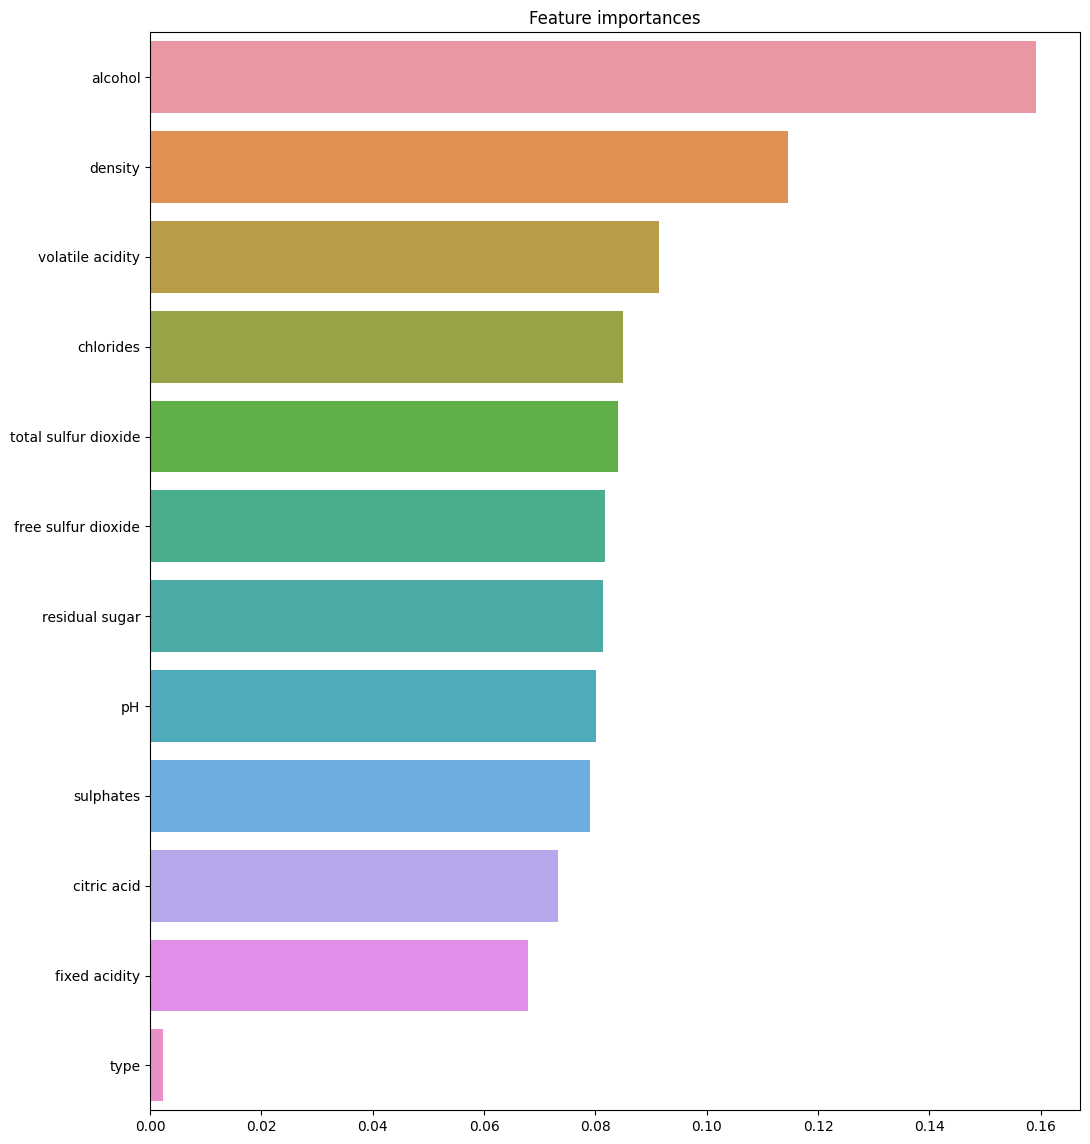

In [22]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

ftr_importances_values=rf_clf.feature_importances_ #피처 중요도
ftr_importances=pd.Series(ftr_importances_values, index=X_train.columns)
ftr_top=ftr_importances.sort_values(ascending=False)

plt.figure(figsize=(12,14))
plt.title('Feature importances')
sns.barplot(x=ftr_top, y=ftr_top.index)
plt.show()

In [16]:
from sklearn.model_selection import GridSearchCV

params={
    'n_estimators':[300],
    'max_depth':range(10,50,10),
    'min_samples_leaf':[6,8,12,18],
    'min_samples_split':[4,8,16,20]
}
#RandomForestClassifier 객체 생성 후 GridSearchCV 수행
rf_clf=RandomForestClassifier(random_state=0, n_jobs=-1)
grid_cv = GridSearchCV(rf_clf, param_grid=params, cv=2, n_jobs=-1)
grid_cv.fit(X_train, y_train)

print('최적 하이퍼 파라미터:\n', grid_cv.best_params_)
print('최고 예측 정확도:{0:4f}'.format(grid_cv.best_score_))

최적 하이퍼 파라미터:
 {'max_depth': 20, 'min_samples_leaf': 6, 'min_samples_split': 4, 'n_estimators': 300}
최고 예측 정확도:0.844894


In [17]:
rf_clf1=RandomForestClassifier(n_estimators=300, max_depth=20, min_samples_leaf=6, min_samples_split=4, random_state=0)
rf_clf1.fit(X_train, y_train)
pred=rf_clf1.predict(X_test)
print('예측 정확도:{0:4f}'.format(accuracy_score(y_test, pred)))

예측 정확도:0.859091


**LightGBM**


In [18]:
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import roc_auc_score

# 성능평가지표 출력함수
def get_clf_eval(y_test, pred=None, pred_proba=None):
    confusion = confusion_matrix( y_test, pred)
    accuracy = accuracy_score(y_test , pred)
    precision = precision_score(y_test , pred)
    recall = recall_score(y_test , pred)
    f1 = f1_score(y_test,pred)
    # ROC-AUC 추가 
    roc_auc = roc_auc_score(y_test, pred_proba)
    print('오차 행렬')
    print(confusion)
    # ROC-AUC print 추가
    print('정확도: {0:.4f}, 정밀도: {1:.4f}, 재현율: {2:.4f}, F1: {3:.4f}, AUC:{4:.4f}'.format(accuracy, precision, recall, f1, roc_auc))

In [19]:
from lightgbm import LGBMClassifier
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')

In [20]:
X_features = train.drop(columns = 'quality',axis=1)
y_label = train['quality']

X_train,X_test,y_train,y_test = train_test_split(X_features,y_label, test_size = 0.2, random_state = 156)
print(X_train.shape,X_test.shape)

(4397, 12) (1100, 12)


In [21]:
print(y_train.value_counts()/y_train.shape[0]*100)
print(y_test.value_counts()/y_test.shape[0]*100)

0    80.054583
1    19.945417
Name: quality, dtype: float64
0    81.454545
1    18.545455
Name: quality, dtype: float64


In [22]:
lgbm_clf1 = LGBMClassifier(n_estimators=400)

# LightGBM도 XGBoost와 동일하게 조기중단 수행가능
evals = [(X_test, y_test)]
lgbm_clf1.fit(X_train, y_train,
                 early_stopping_rounds=100, eval_metric="logloss",
                 eval_set=evals, verbose=True)
preds1 = lgbm_clf1.predict(X_test)
pred_proba1 = lgbm_clf1.predict_proba(X_test)[:, 1]

[1]	valid_0's binary_logloss: 0.458357
[2]	valid_0's binary_logloss: 0.44078
[3]	valid_0's binary_logloss: 0.426129
[4]	valid_0's binary_logloss: 0.414784
[5]	valid_0's binary_logloss: 0.403828
[6]	valid_0's binary_logloss: 0.39626
[7]	valid_0's binary_logloss: 0.389738
[8]	valid_0's binary_logloss: 0.384144
[9]	valid_0's binary_logloss: 0.378528
[10]	valid_0's binary_logloss: 0.372862
[11]	valid_0's binary_logloss: 0.36817
[12]	valid_0's binary_logloss: 0.364873
[13]	valid_0's binary_logloss: 0.362089
[14]	valid_0's binary_logloss: 0.358176
[15]	valid_0's binary_logloss: 0.356696
[16]	valid_0's binary_logloss: 0.354651
[17]	valid_0's binary_logloss: 0.352546
[18]	valid_0's binary_logloss: 0.351067
[19]	valid_0's binary_logloss: 0.349558
[20]	valid_0's binary_logloss: 0.348041
[21]	valid_0's binary_logloss: 0.346228
[22]	valid_0's binary_logloss: 0.344456
[23]	valid_0's binary_logloss: 0.343946
[24]	valid_0's binary_logloss: 0.342735
[25]	valid_0's binary_logloss: 0.342103
[26]	valid_0

In [23]:
get_clf_eval(y_test,preds1,pred_proba1)

오차 행렬
[[855  41]
 [ 99 105]]
정확도: 0.8727, 정밀도: 0.7192, 재현율: 0.5147, F1: 0.6000, AUC:0.8762


In [24]:
from lightgbm import LGBMClassifier
from sklearn.model_selection import GridSearchCV

params = {
    'num_leaves':range(10,50,10),
    'max_depth':range(10,50,10), 
    'min_child_samples':range(10,50,10),
    'subsample':[0.8,1]
}

# cv는 3으로 지정
lgbm_gridcv= GridSearchCV(lgbm_clf1, param_grid=params, cv=3)
lgbm_gridcv.fit(X_train, y_train, 
           early_stopping_rounds=30, eval_metric="logloss",
           eval_set=[(X_train, y_train), (X_test, y_test)])
print('GridSearchCV 최적 파라미터:', lgbm_gridcv.best_params_)
print('최고 예측 정확도:{0:4f}'.format(lgbm_gridcv.best_score_))

스트리밍 출력 내용이 길어서 마지막 5000줄이 삭제되었습니다.
[180]	valid_0's binary_logloss: 0.231643	valid_1's binary_logloss: 0.343743
[181]	valid_0's binary_logloss: 0.231259	valid_1's binary_logloss: 0.343675
[182]	valid_0's binary_logloss: 0.230822	valid_1's binary_logloss: 0.343656
[183]	valid_0's binary_logloss: 0.230537	valid_1's binary_logloss: 0.343997
[184]	valid_0's binary_logloss: 0.23037	valid_1's binary_logloss: 0.344215
[185]	valid_0's binary_logloss: 0.230015	valid_1's binary_logloss: 0.34442
[186]	valid_0's binary_logloss: 0.229162	valid_1's binary_logloss: 0.344927
[187]	valid_0's binary_logloss: 0.228597	valid_1's binary_logloss: 0.344629
[188]	valid_0's binary_logloss: 0.22827	valid_1's binary_logloss: 0.344482
[189]	valid_0's binary_logloss: 0.228034	valid_1's binary_logloss: 0.344427
[190]	valid_0's binary_logloss: 0.227371	valid_1's binary_logloss: 0.344956
[191]	valid_0's binary_logloss: 0.227091	valid_1's binary_logloss: 0.344953
[192]	valid_0's binary_logloss: 0.226544	valid_1's bina

In [25]:
# 최적파라미터로 학습/예측/평가
lgbm_clf2 =  LGBMClassifier(n_estimators=400, num_leaves=40 ,subsample=0.8, min_child_samples=10,max_depth=30)

evals = [(X_test, y_test)]
lgbm_clf2.fit(X_train, y_train, early_stopping_rounds=100, eval_metric="logloss", eval_set=evals, verbose=True)

preds2 = lgbm_clf2.predict(X_test)
pred2_proba = lgbm_clf2.predict_proba(X_test)[:, 1]

get_clf_eval(y_test,preds2,pred2_proba)

[1]	valid_0's binary_logloss: 0.455847
[2]	valid_0's binary_logloss: 0.437094
[3]	valid_0's binary_logloss: 0.423505
[4]	valid_0's binary_logloss: 0.410522
[5]	valid_0's binary_logloss: 0.401635
[6]	valid_0's binary_logloss: 0.393326
[7]	valid_0's binary_logloss: 0.385666
[8]	valid_0's binary_logloss: 0.379415
[9]	valid_0's binary_logloss: 0.373798
[10]	valid_0's binary_logloss: 0.368207
[11]	valid_0's binary_logloss: 0.363255
[12]	valid_0's binary_logloss: 0.359735
[13]	valid_0's binary_logloss: 0.356373
[14]	valid_0's binary_logloss: 0.352651
[15]	valid_0's binary_logloss: 0.350188
[16]	valid_0's binary_logloss: 0.348969
[17]	valid_0's binary_logloss: 0.346146
[18]	valid_0's binary_logloss: 0.344642
[19]	valid_0's binary_logloss: 0.341341
[20]	valid_0's binary_logloss: 0.33895
[21]	valid_0's binary_logloss: 0.337306
[22]	valid_0's binary_logloss: 0.336288
[23]	valid_0's binary_logloss: 0.33516
[24]	valid_0's binary_logloss: 0.3332
[25]	valid_0's binary_logloss: 0.331688
[26]	valid_0'

**스태킹**

In [26]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import warnings
warnings.filterwarnings('ignore')

In [27]:
X_features = train.drop(columns = 'quality',axis=1)
y_labels = train['quality']
X_train, X_test, y_train, y_test = train_test_split(X_features, y_labels, test_size=0.2, random_state=156)

In [28]:
rf_clf1=RandomForestClassifier(n_estimators=300, max_depth=4, min_samples_leaf=6, min_samples_split=4, random_state=0)
xgb_clf2 =  XGBClassifier(n_estimators=100, learning_rate=0.01, max_depth=4, min_child_weight=0.8, subsample=0.8, colsample_bytree=0.8)
lgbm_clf2 =  LGBMClassifier(n_estimators=400, num_leaves=32 ,subsample=0.8, min_child_samples=60,max_depth=128)
knn_clf = KNeighborsClassifier(n_neighbors=4)

In [29]:
from sklearn.model_selection import KFold
from sklearn.metrics import mean_absolute_error

# 개별 기반 모델에서 최종 메타 모델이 사용할 학습 및 테스트용 데이터를 생성하기 위한 함수. 
def get_stacking_base_datasets(model, X_train_n, y_train_n, X_test_n, n_folds ):
    # 지정된 n_folds값으로 KFold 생성.
    kf = KFold(n_splits=n_folds, shuffle=False) 
    #추후에 메타 모델이 사용할 학습 데이터 반환을 위한 넘파이 배열 초기화 
    train_fold_pred = np.zeros((X_train_n.shape[0] ,1 ))
    test_pred = np.zeros((X_test_n.shape[0],n_folds))
    print(model.__class__.__name__ , ' model 시작 ')
    
    # 학습
    for folder_counter, (train_index, valid_index) in enumerate(kf.split(X_train_n)):
        #입력된 학습 데이터에서 기반 모델이 학습/예측할 폴드 데이터 셋 추출 
        print('\t 폴드 세트: ',folder_counter,' 시작 ')
        X_tr = X_train_n.iloc[train_index] 
        y_tr = y_train_n.iloc[train_index] 
        X_te = X_train_n.iloc[valid_index]  
        
        #폴드 세트 내부에서 다시 만들어진 학습 데이터로 기반 모델의 학습 수행.
        model.fit(X_tr , y_tr)       
        #폴드 세트 내부에서 다시 만들어진 검증 데이터로 기반 모델 예측 후 데이터 저장.
        train_fold_pred[valid_index, :] = model.predict(X_te).reshape(-1,1)
        #입력된 원본 테스트 데이터를 폴드 세트내 학습된 기반 모델에서 예측 후 데이터 저장. 
        test_pred[:, folder_counter] = model.predict(X_test_n)
            
    # 테스트, 폴드 세트 내에서 원본 테스트 데이터를 예측한 데이터를 평균하여 테스트 데이터로 생성 
    test_pred_mean = np.mean(test_pred, axis=1).reshape(-1,1)    
    
    #train_fold_pred는 최종 메타 모델이 사용하는 학습 데이터, test_pred_mean은 테스트 데이터
    return train_fold_pred , test_pred_mean

test2 = test
knn_train, knn_test = get_stacking_base_datasets(knn_clf, X_train, y_train, test2, 7)
rf_train, rf_test = get_stacking_base_datasets(rf_clf1, X_train, y_train, test2, 7)
xgb_train, xgb_test = get_stacking_base_datasets(xgb_clf2, X_train, y_train, test2,  7)    
lgbm_train, lgbm_test = get_stacking_base_datasets(lgbm_clf2, X_train, y_train, test2, 7)

KNeighborsClassifier  model 시작 
	 폴드 세트:  0  시작 
	 폴드 세트:  1  시작 
	 폴드 세트:  2  시작 
	 폴드 세트:  3  시작 
	 폴드 세트:  4  시작 
	 폴드 세트:  5  시작 
	 폴드 세트:  6  시작 
RandomForestClassifier  model 시작 
	 폴드 세트:  0  시작 
	 폴드 세트:  1  시작 
	 폴드 세트:  2  시작 
	 폴드 세트:  3  시작 
	 폴드 세트:  4  시작 
	 폴드 세트:  5  시작 
	 폴드 세트:  6  시작 
XGBClassifier  model 시작 
	 폴드 세트:  0  시작 
	 폴드 세트:  1  시작 
	 폴드 세트:  2  시작 
	 폴드 세트:  3  시작 
	 폴드 세트:  4  시작 
	 폴드 세트:  5  시작 
	 폴드 세트:  6  시작 
LGBMClassifier  model 시작 
	 폴드 세트:  0  시작 
	 폴드 세트:  1  시작 
	 폴드 세트:  2  시작 
	 폴드 세트:  3  시작 
	 폴드 세트:  4  시작 
	 폴드 세트:  5  시작 
	 폴드 세트:  6  시작 


In [30]:
# 각 모델별 학습/테스트 데이터 합치기
Stack_final_X_train = np.concatenate((knn_train, rf_train, xgb_train, lgbm_train), axis=1)
Stack_final_X_test = np.concatenate((knn_test, rf_test, xgb_test, lgbm_test), axis=1)
print('원본 학습 피처 데이터 Shape:',X_train.shape, '원본 테스트 피처 Shape:',X_test.shape)
print('스태킹 학습 피처 데이터 Shape:', Stack_final_X_train.shape,
      '스태킹 테스트 피처 데이터 Shape:',Stack_final_X_test.shape)

원본 학습 피처 데이터 Shape: (4397, 12) 원본 테스트 피처 Shape: (1100, 12)
스태킹 학습 피처 데이터 Shape: (4397, 4) 스태킹 테스트 피처 데이터 Shape: (1000, 4)


In [31]:
X_test=X_test.iloc[:1000]
y_test=y_test.iloc[:1000]
print('원본 학습 피처 데이터 Shape:',X_train.shape, '원본 테스트 피처 Shape:',X_test.shape)
print('스태킹 학습 피처 데이터 Shape:', Stack_final_X_train.shape,
      '스태킹 테스트 피처 데이터 Shape:',Stack_final_X_test.shape)

원본 학습 피처 데이터 Shape: (4397, 12) 원본 테스트 피처 Shape: (1000, 12)
스태킹 학습 피처 데이터 Shape: (4397, 4) 스태킹 테스트 피처 데이터 Shape: (1000, 4)


In [32]:
# 최종 메타 모델 돌리기
from sklearn.linear_model import LogisticRegression
lr_final = LogisticRegression(C=10)
lr_final.fit(Stack_final_X_train, y_train) # 최종 메타 모델 돌릴 때, 원본 학습 라벨 y_train 가져야 써야함
stack_final = lr_final.predict(Stack_final_X_test)

In [33]:
print('최종 메타 모델의 예측 정확도: {0:.4f}'.format(accuracy_score(y_test, stack_final)))

최종 메타 모델의 예측 정확도: 0.7410


In [43]:
sub['quality'] = stack_final
sub.to_csv("/content/drive/MyDrive/ESAA_data/final.csv",index=False)